In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [2]:
wgaln_dir = '/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006'

In [3]:
!ls -lh {wgaln_dir}/lastz/*

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_7g8:
total 54M
-rw-rw-r-- 1 aliman aliman 4.1K Apr  8 19:27 3d7_7g8.log
-rw-rw-r-- 1 aliman aliman  19M Apr  8 19:27 3d7_7g8.rdotplot
-rw-rw-r-- 1 aliman aliman  36M Apr  8 19:27 3d7_7g8.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_dd2:
total 197M
-rw-rw-r-- 1 aliman aliman 2.1K Apr  8 21:31 3d7_dd2.log
-rw-rw-r-- 1 aliman aliman  83M Apr  8 21:31 3d7_dd2.rdotplot
-rw-rw-r-- 1 aliman aliman 114M Apr  8 21:31 3d7_dd2.sam

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_hb3:
total 318M
-rw-rw-r-- 1 aliman aliman 1.4K Apr  8 23:32 3d7_hb3.log
-rw-rw-r-- 1 aliman aliman 140M Apr  8 23:32 3d7_hb3.rdotplot
-rw-rw-r-- 1 aliman aliman 179M Apr  8 23:32 3d7_hb3.sam


In [4]:
!cat {wgaln_dir}/lastz/3d7_hb3/3d7_hb3.log

(4.687s) processing query 1: AANS01000001
(1381.441s) processing query 101: AANS01000101
(1389.069s) processing query 201: AANS01000201
(1363.469s) processing query 301: AANS01000301
(1846.941s) processing query 401: AANS01000401
(1556.137s) processing query 501: AANS01000501
(1431.716s) processing query 601: AANS01000601
(1456.002s) processing query 701: AANS01000701
(1539.821s) processing query 801: AANS01000801
(1436.745s) processing query 901: AANS01000901
(1428.852s) processing query 1001: AANS01001001
(1181.358s) processing query 1101: AANS01001101
(1298.372s) processing query 1201: AANS01001201
(1290.319s) processing query 1301: AANS01001301
(1214.562s) processing query 1401: AANS01001401
(1336.309s) processing query 1501: AANS01001501
(1140.124s) processing query 1601: AANS01001601
(876.087s) processing query 1701: AANS01001701
(934.867s) processing query 1801: AANS01001801
(637.831s) processing query 1901: AANS01001901
(510.619s) processing query 2001: AANS01002001
(328.593s) 

## Variant calling

In [5]:
samtools = '/data/plasmodium/pfalciparum/pf-crosses/opt/samtools-1.2/samtools'
!{samtools}


Program: samtools (Tools for alignments in the SAM format)
Version: 1.2 (using htslib 1.2.1)

Usage:   samtools <command> [options]

Commands:
  -- indexing
         faidx       index/extract FASTA
         index       index alignment
  -- editing
         calmd       recalculate MD/NM tags and '=' bases
         fixmate     fix mate information
         reheader    replace BAM header
         rmdup       remove PCR duplicates
         targetcut   cut fosmid regions (for fosmid pool only)
  -- file operations
         bamshuf     shuffle and group alignments by name
         cat         concatenate BAMs
         merge       merge sorted alignments
         mpileup     multi-way pileup
         sort        sort alignment file
         split       splits a file by read group
         bam2fq      converts a BAM to a FASTQ
  -- stats
         bedcov      read depth per BED region
         depth       compute the depth
         flagstat    simple stats
         idxstats    BAM index stats


In [6]:
bcftools = '/data/plasmodium/pfalciparum/pf-crosses/opt/bcftools-1.2/bcftools'
!{bcftools}


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
Version: 1.2 (using htslib 1.2.1)

Usage:   bcftools <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    view         VCF/BCF conversion, view, subset and filter VCF/BCF files

 -- VCF/BCF analysis
    call         SNP/indel calling
    consensus    create consensus sequence by applying VCF variants
    filter       filter VCF/BCF files 

In [7]:
fasta_fn = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'
genome = pyfasta.Fasta(fasta_fn)

In [8]:
method = 'lastz'
alignment = '3d7_hb3'
sam_fn = os.path.join(wgaln_dir, method, alignment, '%s.sam' % alignment)
!ls -lh {sam_fn}
bam_fn = sam_fn[:-3] + 'bam'
!ls -lh {bam_fn}

-rw-rw-r-- 1 aliman aliman 179M Apr  8 23:32 /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_hb3/3d7_hb3.sam
ls: cannot access /data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_hb3/3d7_hb3.bam: No such file or directory


In [9]:
!{samtools} sort

Usage: samtools sort [options...] [in.bam]
Options:
  -l INT     Set compression level, from 0 (uncompressed) to 9 (best)
  -m INT     Set maximum memory per thread; suffix K/M/G recognized [768M]
  -n         Sort by read name
  -o FILE    Write final output to FILE rather than standard output
  -O FORMAT  Write output as FORMAT ('sam'/'bam'/'cram')   (either -O or
  -T PREFIX  Write temporary files to PREFIX.nnnn.bam       -T is required)
  -@ INT     Set number of sorting and compression threads [1]

Legacy usage: samtools sort [options...] <in.bam> <out.prefix>
Options:
  -f         Use <out.prefix> as full final filename rather than prefix
  -o         Write final output to stdout rather than <out.prefix>.bam
  -l,m,n,@   Similar to corresponding options above


In [10]:
if not os.path.exists(bam_fn):
    !{samtools} sort -O bam {sam_fn} -T tmp > {bam_fn}
    !{samtools} index {bam_fn}

In [15]:
def plot_coverage(bam_fn, chrom):
    bam = pysam.AlignmentFile(bam_fn)
    cov = pysamstats.load_coverage(bam, chrom=chrom, pad=True)
    fig, ax = plt.subplots(figsize=(9, 1))
    sns.despine(ax=ax, offset=10)
    seq = np.asarray(genome[chrom])
    x = cov.pos
    y = cov.reads_all
    ax.fill_between(x, 0, y, color='k')
    ax.set_xlim(0, len(seq))
    ax.set_ylim(0, 20)
    ax.set_yticks(np.arange(0, 20, 5))
    ax.grid(axis='y')
    ax.set_title(chrom);

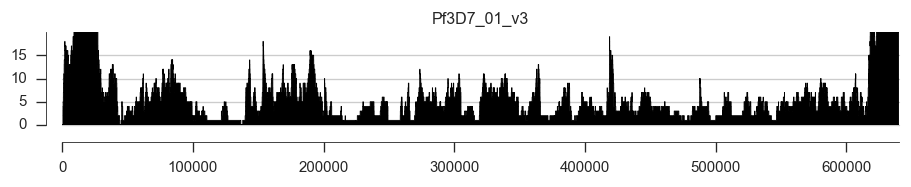

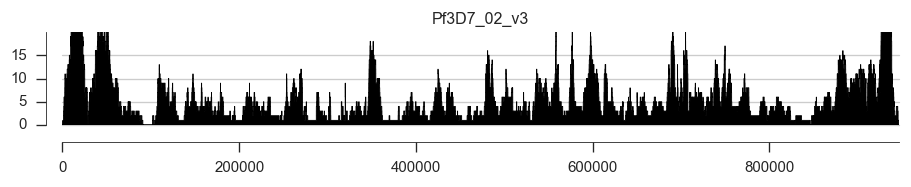

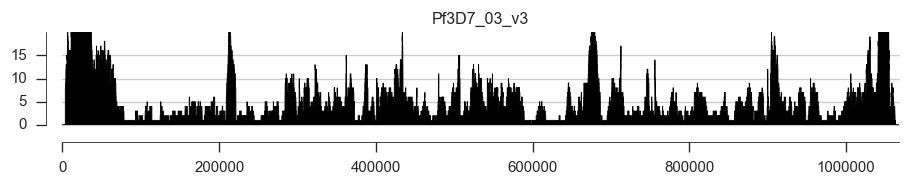

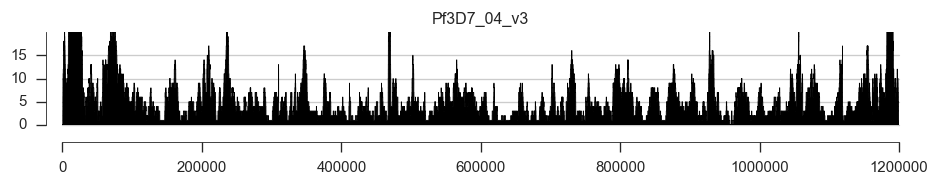

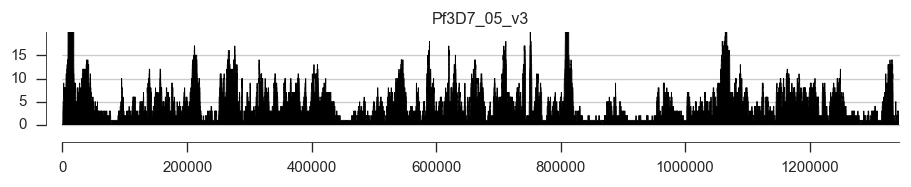

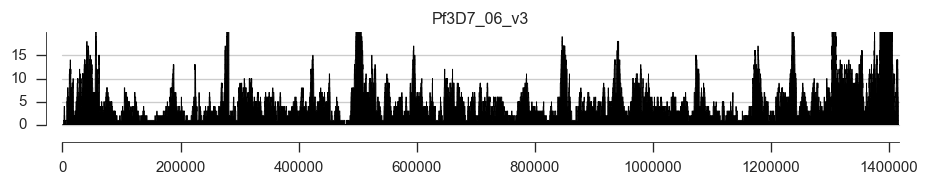

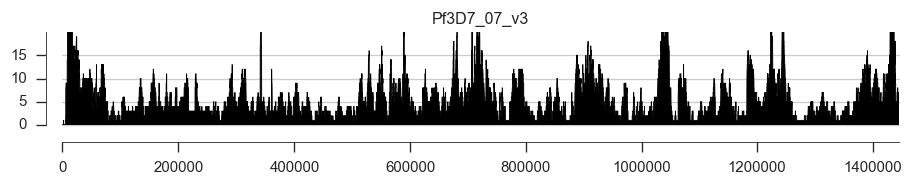

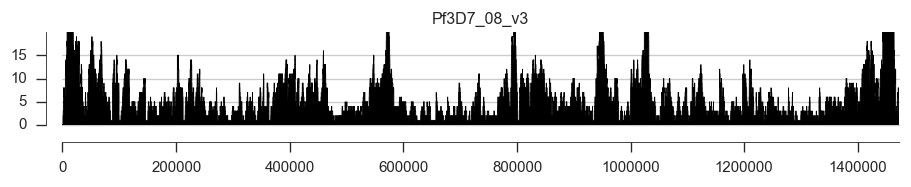

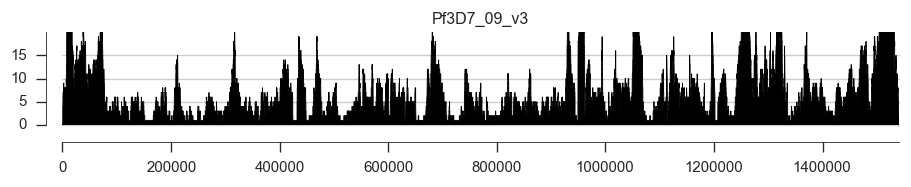

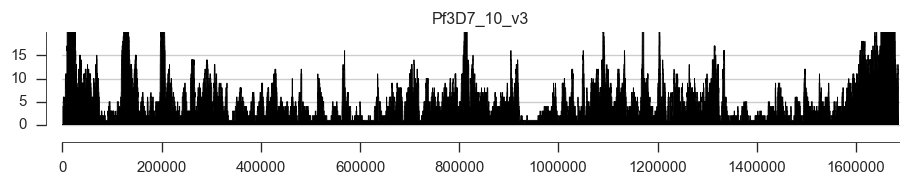

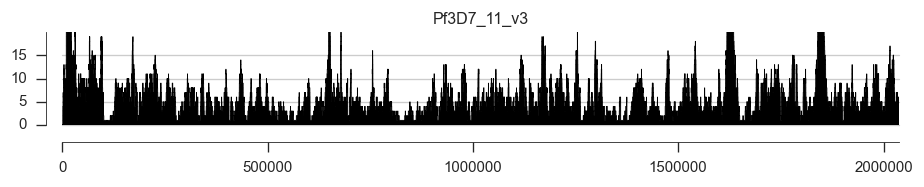

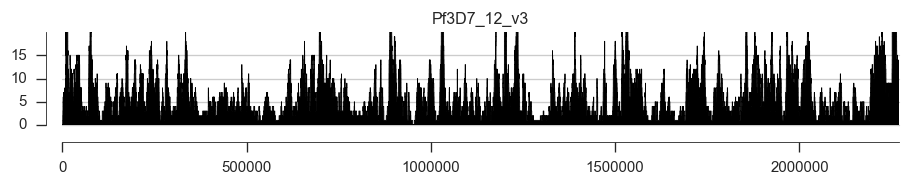

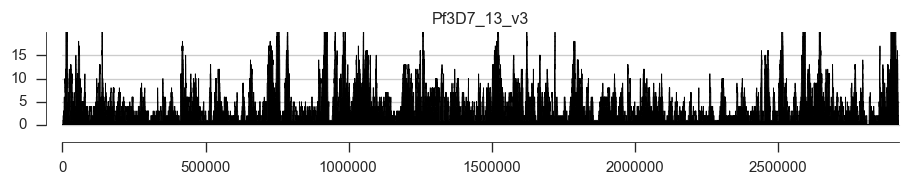

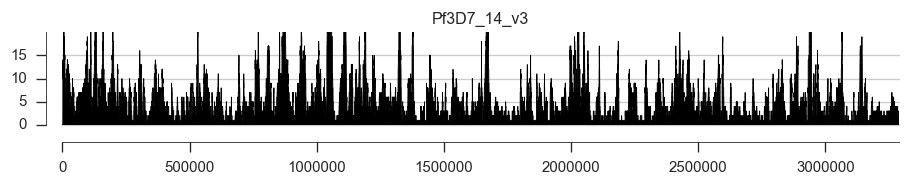

In [16]:
for chrom in CHROMOSOMES:
    plot_coverage(bam_fn, str(chrom, 'ascii'))
    plt.show()

In [17]:
!{samtools} mpileup


Usage: samtools mpileup [options] in1.bam [in2.bam [...]]

Input options:
  -6, --illumina1.3+      quality is in the Illumina-1.3+ encoding
  -A, --count-orphans     do not discard anomalous read pairs
  -b, --bam-list FILE     list of input BAM filenames, one per line
  -B, --no-BAQ            disable BAQ (per-Base Alignment Quality)
  -C, --adjust-MQ INT     adjust mapping quality; recommended:50, disable:0 [0]
  -d, --max-depth INT     max per-BAM depth; avoids excessive memory usage [250]
  -E, --redo-BAQ          recalculate BAQ on the fly, ignore existing BQs
  -f, --fasta-ref FILE    faidx indexed reference sequence file
  -G, --exclude-RG FILE   exclude read groups listed in FILE
  -l, --positions FILE    skip unlisted positions (chr pos) or regions (BED)
  -q, --min-MQ INT        skip alignments with mapQ smaller than INT [0]
  -Q, --min-BQ INT        skip bases with baseQ/BAQ smaller than INT [13]
  -r, --region REG        region in which pileup is generated
  -R, --ignore-

In [18]:
!{bcftools} call


About:   SNP/indel variant calling from VCF/BCF. To be used in conjunction with samtools mpileup.
         This command replaces the former "bcftools view" caller. Some of the original
         functionality has been temporarily lost in the process of transition to htslib,
         but will be added back on popular demand. The original calling model can be
         invoked with the -c option.
Usage:   bcftools call [options] <in.vcf.gz>

File format options:
   -o, --output <file>             write output to a file [standard output]
   -O, --output-type <b|u|z|v>     output type: 'b' compressed BCF; 'u' uncompressed BCF; 'z' compressed VCF; 'v' uncompressed VCF [v]
   -r, --regions <region>          restrict to comma-separated list of regions
   -R, --regions-file <file>       restrict to regions listed in a file
   -s, --samples <list>            list of samples to include [all samples]
   -S, --samples-file <file>       PED file or a file with optional second column for ploidy (0, 1

In [19]:
samples_fn = bam_fn + '.samples'
if not os.path.exists(samples_fn):
    with open(samples_fn, 'wt') as f:
        print('%s\t%s' % (bam_fn, 1), file=f)
!cat {samples_fn}

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_hb3/3d7_hb3.bam	1


In [20]:
raw_vcf_fn = bam_fn[:-3] + 'bcftools_m.vcf.gz'
raw_vcf_fn

'/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/lastz/3d7_hb3/3d7_hb3.bcftools_m.vcf.gz'

In [ ]:
if not os.path.exists(raw_vcf_fn):
    !{samtools} mpileup -u --vcf -A -B -C0 -x --fasta-ref {fasta_fn} {bam_fn} \
        | {bcftools} call - -m -O v -S {samples_fn} -v \
        | bgzip -c > {raw_vcf_fn}
    !tabix -p vcf {raw_vcf_fn}

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [ ]:
gatk_jar = '/data/plasmodium/pfalciparum/pf-crosses/opt/GenomeAnalysisTK-3.3-0/GenomeAnalysisTK.jar'

In [ ]:
!java -version

In [ ]:
fasta_fn

In [ ]:
#!java -Xmx2G -jar {picard_dir}/CreateSequenceDictionary.jar R={fasta_fn} O={fasta_fn[:-2] + 'dict'}

In [ ]:
gatk = 'java -Xmx2G -jar {gatk_jar} -R {fasta_fn}'.format(**locals())
gatk

In [ ]:
!{gatk} --help

In [ ]:
laat_vcf_fn = bam_fn[:-3] + 'laat.vcf.gz'
laat_vcf_fn

In [ ]:
!ls -l {raw_vcf_fn}

In [ ]:
#!rm -v {laat_vcf_fn}*

In [ ]:
if not os.path.exists(laat_vcf_fn):
    !{gatk} -T LeftAlignAndTrimVariants -V {raw_vcf_fn} -trim -o {laat_vcf_fn[:-3]}
    !bgzip {laat_vcf_fn[:-3]} && tabix -p vcf {laat_vcf_fn}